# Is paying off your mortgage ASAP a good idea?
Let's do a case study using the following tools. Suppose we decide to take a
loan of 1 million dollars. How does the cost change depending on whether we
pay it off in 10 years vs 40 years? How does it affect our savings? Should
we pay a higher monthly mortgage if we have a larger income? We will attempt
to answer these questions using simple interest rates calculations that
ignores fixed fees for now.

In [83]:
import finanpy as fp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Formula
The following function is based on the [amortization formula]
(https://en.wikipedia.org/wiki/Amortization_calculator). For a given principal,
annual interest rate, and period of repayment (in months), the formula \
calculates the monthly repayment (c), amount that goes towards paying the
principal (cp), amount that goes to servicing the debt (ci),
and the remaining debt after a single monthly payment. Notice that the formula
fixes the length of repayment and makes all other calculations based on that.
If the interest rate rises for a particular month, the formula will be able to
calculate a new monthly payment to preserve repayment term.

In [84]:
output = fp.amortize_month(10000,0.0512,12) #c cp ci debt
output


(856.62483221822, 813.9581655515534, 42.66666666666667, 9186.041834448446)

## Amortization Schedule
Using amortize_month(), we will calculate the repayment schedule for a typical
home loan of 1 million dollars with fixed or variable interest rates.

In [110]:
Y = 20 #number of years
# Annual interest rates for Y number of years
#pa = (np.random.randn(40)*0.01+0.03) #
#pa[0:3] = 0.02
pa = np.zeros(Y)+0.026 #This is the rate for a HDB Loan
output = fp.amortize_schedule(1000000,pa) #month, c, cp, ci, debt, ti


The following plot illustrates the amortization schedule. Notice that for
long term loans, the amount that goes towards paying interest is very high,
typically $2k per month at least for the first year. Because it is money
that you don't get back, you could think of it as a form of rent.


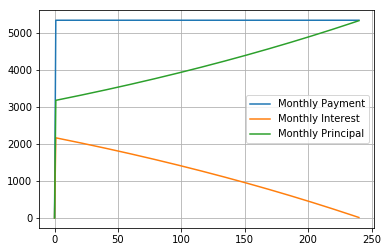

In [111]:
plt.figure()
plt.ion()
plt.plot(output['month'], output['c'], label='Monthly Payment')
plt.plot(output['month'], output['ci'], label='Monthly Interest')
plt.plot(output['month'], output['cp'], label='Monthly Principal')
plt.legend()
plt.grid()


The total interest and amount paid is:


In [112]:
# Total Paid
Ti = output['ti'][-1] # Total Interest
Tp = output['debt'][0] + output['ti'][-1] # Total paid
Pi = output['ti'][-1]/(output['debt'][0] + output['ti'][-1]) # percentage on principal
Ti,Tp,Pi


(283491.32486684853, 1283491.3248668485, 0.22087513906356818)

## Opportunity cost
Next, we will look at the kinds of opportunity cost associated with taking a
home loan. We will first look at the differences without consideration for
rent, fixed cost, incomes, liquidity etc. and focus purely on investment in
real estate vs equity and bonds.

Suppose the house appreciates over time. What is the average annual
appreciation rate in the value of the house to break even?
Applying the following formula, we will need the effective interest rate to
be around 1% to break even.


In [88]:
# Equivalent Interest needed to break even
Target = Tp # Target value after Y years
Ei = (Tp / output['debt'][0]) ** (1. / Y) - 1
Ei


0.011969778081608817

Now suppose we use that mortgage payment and put it in a savings plan or into
low risk equities and bonds. We will assume an average long term return of 5%.
The following formula calculates the money we would have gotten.


In [89]:
# Amount of money if monthly payments went into savings
Rr = 0.05 # Low Risk Annual Return
spa = np.ones(len(pa)) * Rr # Savings interest rate
savings = fp.save_series(output['c'][1:], spa)
# Equivalent Interest needed to break even
Target = savings[-1]
Ei = (Target / output['debt'][0]) ** (1. / Y) - 1
Ei


0.041658875296163744

## Portfolio Comparison
Let's now compare two scenarios.

1. Paying off a mortgage in 20 years vs
1. Paying off a mortgage in 40 years.

For a given income, the remainder not used to pay off the mortgage will be
added to a savings account.

In [90]:
ms = 7000 # Monthly Salary
Rr = 0.04 # Low Risk Annual Return
Hr = 0.026 # Home Loan (2.6% is HDB's load rate)
Y1 = 10
Y2 = 30


In [91]:
pa1 = np.zeros(Y1) + Hr
spa1 = np.ones(Y2) * Rr # Savings interest rate
output1 = fp.amortize_schedule(1000000,pa1) #month, c, cp, ci, debt, ti
output1['c'][1:]
msav1 = ms - np.array(output1['c'][1:])
msav1 = np.append(msav1, np.ones((Y2 - Y1) * 12) * ms)


savings1 = fp.save_series(msav1, spa1)


In [92]:
pa2 = np.zeros(Y2) + Hr
spa2 = np.ones(Y2) * Rr # Savings interest rate
output2 = fp.amortize_schedule(1000000,pa2) #month, c, cp, ci, debt, ti
msav2 = ms - np.array(output2['c'][1:])
savings2 = fp.save_series(msav2, spa2)
savings1[-1], savings2[-1]


(1758224.950311657, 2079790.4472514002)

Interestingly, while there is some benefits to paying over a longer period
and putting the remainder in equities or higher return instruments, the
benefit will depend a lot on the different in interest rates and the period of
repayment. Below are a few examples:


In [93]:
def plotsave(sav,y1,y2):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    plt.plot(np.arange(y2*12+1),sav[0],label=str(y1))
    plt.plot(np.arange(y2*12+1),sav[1],label=str(y2))
    plt.legend()
    plt.grid()
    plt.text(0.8,0.2,'{}-->{:05.0f}\n{}-->{:05.0f}'.\
    format(y1,sav[0][-1],y2,sav[1][-1]),transform = ax.transAxes)


Using a million dollar loan as a baseline.

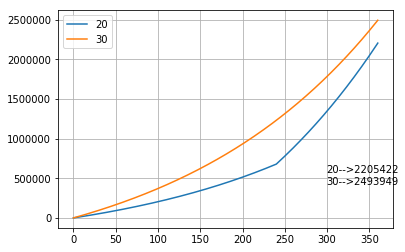

In [94]:
y1,y2=20,30
sav=fp.mortgage_invest(1000000, 7000, 0.05, 0.026, y1,y2)
plotsave(sav,y1,y2)


Suppose the market performs better than expected.

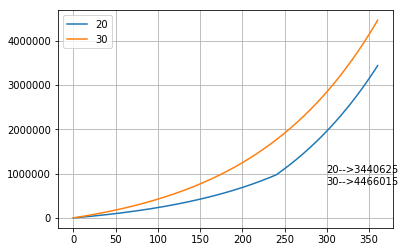

In [95]:
y1,y2=20,30
sav=fp.mortgage_invest(1000000, 7000, 0.08, 0.026, y1,y2)
plotsave(sav,y1,y2)


Suppose you opt for a longer repayment.

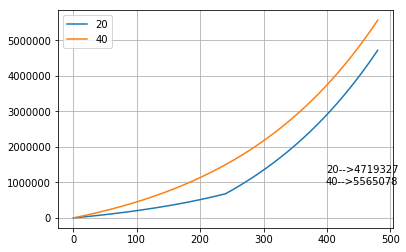

In [96]:
y1,y2=20,40
sav=fp.mortgage_invest(1000000, 7000, 0.05, 0.026, y1,y2)
plotsave(sav,y1,y2)


In [97]:
# y1,y2=10,30
# sav=fp.mortgage_invest(1000000, 7000, 0.1, 0.026, y1,y2)
# plotsave(sav,y1,y2)
# This doesn't work because the period is too short so the repayment is more
# than the monthly salary


Suppose you opt for different principals and different repayment amounts.

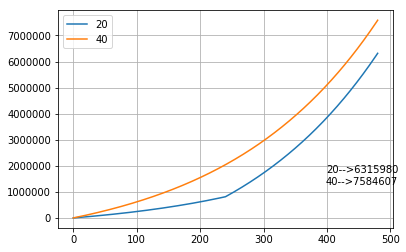

In [98]:
y1,y2=20,40
sav=fp.mortgage_invest(1500000, 10000, 0.05, 0.026, y1,y2)
plotsave(sav,y1,y2)


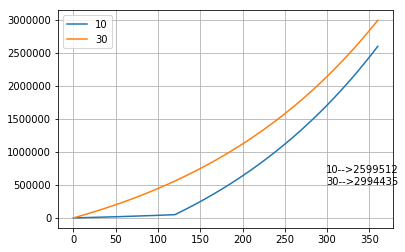

In [99]:
y1,y2=10,30
sav=fp.mortgage_invest(600000, 6000, 0.05, 0.026, y1,y2)
plotsave(sav,y1,y2)


What if the interest rates are equal?

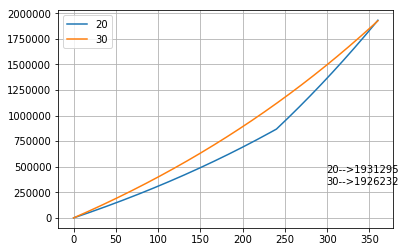

In [114]:
y1,y2=20,30
sav=fp.mortgage_invest(600000, 6000, 0.025, 0.026, y1,y2)
plotsave(sav,y1,y2)


Here are a few takeaways:
* If the loan and savings interest rates are equal, you end up saving the
  same amount of money regardless of the length of mortgage repayment.
* If the load and the savings interest rates differ substantially,
  it pays to have a longer mortgage. You consistently get a bigger savings
  of ~20% higher.
  * You can think of longer term repayment strategies as ways to use the
      higher returns from equity investments to offset loan interest
      payments.
  * The interest payment on the loan may seem large compared to interest
      accumulated from a small initial investment. It is therefore tempting
      to favor reducing loan interest payment instead of accumulating
      investment interest, but that is **wrong**!
  * In reality, paying more in mortgages only reduces your
      loan interest by a small amount (due to lower interest rates) whereas
      allocating more money for investment allows for bigger investment
      returns (due to higher interest rates). E.g. If I spend 2000 on
      repayment, I save on 4.33 of loan interest the next month. If I spend
      the same money on investment instead, I gain 8.33 that month.
       I essentially have an extra 4.
* If interest rates are equal, there is no difference in the amount of
  savings accumulated.
* If the loan's interest will likely be stronger than investment returns, it
  is better to pay off the mortgage ASAP.
* An **even better strategy** is to delay flat purchase as late as possible,
  preferably after you have accumulated sufficent wealth from equities.
  Of course, this strategy should be balanced with capital appreciation on
  real estate. If real estate is stronger than equities, buy early to enjoy
  the capital appreciation.ç